In [2]:
pip install datefinder

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import os 
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.chrome.service import Service
import datetime
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver import ActionChains
import datefinder
from datetime import timedelta
from bs4 import BeautifulSoup
import requests
from time import sleep
import warnings
import newspaper
from newspaper import Article
warnings.filterwarnings('ignore')

In [2]:
ser=Service(r"C:\Users\sawanta\OneDrive - Dun and Bradstreet\Desktop\chromedriver.exe")
op = webdriver.ChromeOptions()
wb = webdriver.Chrome(service=ser, options=op)

options = webdriver.ChromeOptions()
options.add_argument('--headless')

In [3]:
date = datetime.datetime(2022, 10, 17)

In [4]:
date_minus_oneday = date-timedelta(days=1)

In [5]:
required_day=date.day
previous_day=date_minus_oneday.day
current_month=date_minus_oneday.month
current_year=date_minus_oneday.year

In [6]:
def datefind(a):
    matches=datefinder.find_dates(a)
    for match in matches:
        return match

In [7]:
def page_date_finder():
    time_css=wb.find_elements(By.CSS_SELECTOR,'time.date-format')
    for i in time_css:
        page_date=i.get_attribute('data-time')
        p_date=datefind(page_date)
        day=p_date.day
        month=p_date.month
        year=p_date.year
    return day,month,year

In [43]:
#/html/body/div[9]/div/a/div/img
#<img class="offerImg" src="/photo/94393871.cms">
#<div class="imgClose"><img src="/photo/84253648.cms"></div>

In [11]:
wb.get("https://economictimes.indiatimes.com")

In [19]:
wb.get("https://economictimes.indiatimes.com")
time.sleep(30)
while True:
    try:
        day,month,year=page_date_finder()
        if(day==previous_day and month==current_month and year==current_year):
            page=wb.page_source
            break
        else:
            wb.execute_script("arguments[0].scrollIntoView(true);", WebDriverWait(wb, 10).until(EC.visibility_of_element_located((By.CSS_SELECTOR,'div.autoload_continue'))))
            wb.execute_script("arguments[0].click();", WebDriverWait(wb, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR,'div.autoload_continue')))


SyntaxError: invalid syntax (1819003077.py, line 12)

In [ ]:
    #except:
        #close_button=wb.find_element(By.CSS_SELECTOR,'div.imgClose')
        #close_button.click()
        #continue

In [37]:
#with open('C:/News Media Analysis/bs.txt', 'w',encoding="utf-8") as f:
    #f.write(page)

In [15]:
#with open("C:/News Media Analysis/bs.txt",encoding="utf-8") as f:
    #page = f.read()

In [11]:
soup=BeautifulSoup(page, 'lxml')
prtify=soup.prettify()

<html class="no-js free_user win chrome chrome1 webkit webkit5" lang="en" xmlns:g="http://base.google.com/ns/1.0" xmlns:java="java" xmlns:listval="com.indiatimes.cms.utilities.CMSDateUtility" xmlns:nohtml="com.til.utils.CommonUtils" xmlns:valurl="com.times.utilities.CMSWebUtility" xmlns:xhtml="http://www.w3.org/1999/xhtml"><head><script async="" src="https://script.4dex.io/localstore.js" type="text/javascript"></script><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta charset="utf-8"/><title>Stocks in News Today - Latest News on Stocks, Stock in News | The Economic Times</title><link href="/manifest.cms" rel="manifest"/><link href="https://www.google-analytics.com" rel="preconnect"/><link href="https://connect.facebook.net" rel="preconnect"/><link href="https://cm.g.doubleclick.net" rel="preconnect"/><link href="https://googleads.g.doubleclick.net" rel="preconnect"/><link href="https://googleads.g.doubleclick.net" rel="preconnect"/><link href="https://img.etimg.
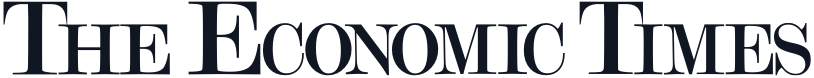

In [12]:
soup

In [13]:
article_links=[]
for each_story in soup.find_all("div",{'class':"eachStory"}):
    t1=each_story.find('time',attrs={"class" : "date-format"})
    t2=t1['data-time']
    story_date=datefind(t2)
    story_day=story_date.day
    story_month=story_date.month
    story_year=story_date.year
    if(story_day==required_day and story_month==current_month and story_year==current_year):
        l1=each_story.find('a')
        article_links.append(l1['href'])

In [14]:
article_links

['/markets/stocks/news/tube-investments-varun-beverages-tvs-motor-may-enter-msci-index-nuvama-research/articleshow/94925224.cms',
 '/markets/stocks/news/sharekhan-downgrades-this-multibagger-tata-stock/articleshow/94925137.cms',
 '/markets/stocks/news/bnp-paribas-nippon-india-mf-buy-stakes-in-electronics-mart-india/articleshow/94924950.cms',
 '/markets/stocks/news/ahead-of-market-10-things-to-determine-d-st-action-on-tuesday/articleshow/94924609.cms',
 '/markets/stocks/news/investors-on-wall-street-seem-to-be-taking-uks-policy-rollbacks-positively-peter-cardillo-spartan-capital-securities/videoshow/94924399.cms',
 '/markets/stocks/news/sbi-cuts-savings-deposit-rate-by-5-basis-points-to-2-70-per-cent-bob-raises-fcnr-deposit-rates/articleshow/94928131.cms',
 '/markets/stocks/news/markets-rally-further-these-6-stocks-touch-their-new-52-week-high/slideshow/94923608.cms',
 '/markets/stocks/news/nse-might-exclude-hdfc-from-the-nifty-index-in-the-next-few-weeks-the-move-could-see-an-outflow-o

In [15]:
import pandas as pd
import newspaper
from newspaper import Article
import time
from time import sleep
from datetime import date
import requests
from bs4 import BeautifulSoup
import warnings
from datetime import datetime, timedelta
warnings.filterwarnings('ignore')
import datefinder


# output file path
path="C:/News Media Analysis/NewsandSentimentsAnalysis_6Oct5.xlsx"
#wb=pd.ExcelWriter(path)
cols = ['Date', 'URL', 'Category', 'Headline', 'News']
datalists = dict()
for item in cols:
    datalists[item] = []

# News paper link    
url="https://economictimes.indiatimes.com/markets/stocks/news"

try:
    #pg=requests.get(url, verify=False)
    soup=BeautifulSoup(page, 'lxml')
    prtify=soup.prettify()
    #link=soup.find_all("a")
    for lnk in article_links:
        #href=lnk.get('href')
        href=lnk
        print(href)
        if href is None:
            continue
        if "/articleshow/" in href:
            if "/hindi/" not in href:
                if "/news/economy/" in href:
                    news=href
                elif "/markets/" in href:
                    if "/expert-view/" not in href:
                        news=href
                elif "/Small-biz/" in href:
                    news=href
                elif "/industry/" in href:
                    if "entertainment" not in href:
                        if "electronics" not in href:
                            if "/advertising/" not in href:
                                news=href
                elif "/tech/ites/" in href:
                    news=href
                elif "/small-biz/" in href:
                    news=href
                else:
                    continue
                if "https" not in news:
                    news=url+news
                    #print('URL-',news)
                    # Appending data into datalists
                    datalists['URL'].append(news)
                    
                    cat1=news.split(".com")[1]
                    cat2=cat1.split("/")
                    cat_fin=cat2[1]+"/"+cat2[2]#+"/"+cat2[3]print("Category: "+cat_fin)
                    # Appending data into datalists
                    datalists['Category'].append(cat_fin)
                    #print('Category-',cat_fin)
                    arti=Article(news)
                    try:
                        pg2=requests.get(news, verify=False)
                        soup2=BeautifulSoup(pg2.content, 'lxml')
                        prtify2=soup2.prettify()
                        
                        date=soup2.find('time',{'class':"jsdtTime"})
                        datalists['Date'].append(date.text)
                        
                        head=prtify2.split('"headline": "')[1]
                        headline=head.split('"description":')[0]
                        headline=headline.rstrip().strip('",')
                        #print('headline')
                        datalists['Headline'].append(headline)
                        arti=prtify2.split('"articleBody":"')[1]
                        txt=arti.split('"image": {')[0]
                        txt=txt.rstrip().strip('",')
                        # Appending data into datalists
                        datalists['News'].append(txt)
                        print('Article')
                    except:
                        pass
                else:
                    print('Without HTTP -',news)
except:
    pass

/markets/stocks/news/tube-investments-varun-beverages-tvs-motor-may-enter-msci-index-nuvama-research/articleshow/94925224.cms
Article
/markets/stocks/news/sharekhan-downgrades-this-multibagger-tata-stock/articleshow/94925137.cms
Article
/markets/stocks/news/bnp-paribas-nippon-india-mf-buy-stakes-in-electronics-mart-india/articleshow/94924950.cms
Article
/markets/stocks/news/ahead-of-market-10-things-to-determine-d-st-action-on-tuesday/articleshow/94924609.cms
Article
/markets/stocks/news/investors-on-wall-street-seem-to-be-taking-uks-policy-rollbacks-positively-peter-cardillo-spartan-capital-securities/videoshow/94924399.cms
/markets/stocks/news/sbi-cuts-savings-deposit-rate-by-5-basis-points-to-2-70-per-cent-bob-raises-fcnr-deposit-rates/articleshow/94928131.cms
Article
/markets/stocks/news/markets-rally-further-these-6-stocks-touch-their-new-52-week-high/slideshow/94923608.cms
/markets/stocks/news/nse-might-exclude-hdfc-from-the-nifty-index-in-the-next-few-weeks-the-move-could-see-an

Article
/markets/stocks/news/dbus-to-boost-rbis-financial-inclusion-efforts-das/articleshow/94903842.cms
Article
/markets/stocks/news/bajaj-autos-going-strong-at-home-but-weak-exports-may-hit-growth/articleshow/94903810.cms
/markets/stocks/news/nifty-may-trade-in-16450-17450-range-analysts/articleshow/94903705.cms
Article
/markets/stocks/news/stock-radar-up-80-from-june-lows-rally-intact-in-this-financial-services-firm-which-hit-a-fresh-multi-year-high-in-october/articleshow/94894283.cms
/markets/stocks/news/stock-radar-this-stock-is-on-cusp-of-witnessing-a-multi-year-breakout-on-weekly-charts-says-gaurav-bissa/videoshow/94880296.cms
/markets/stocks/news/bank-of-maharashtra-lowers-home-and-personal-loan-interest-rates-by-30-to-70-basis-points/articleshow/94903628.cms
Article
/markets/stocks/news/currency-outweighs-inflation-relief-for-monetary-panel-for-now/articleshow/94903583.cms
Article
/markets/stocks/news/reliance-jio-in-talks-with-global-lenders-to-raise-1-5-billion/articleshow/9

In [16]:
data = pd.DataFrame.from_dict(datalists, orient='index')
data = data.transpose()

#print("--- %s seconds ---" % (time.time() - start_time))

In [17]:
data

,Date,URL,Category,Headline,News
0,"Last Updated: Oct 17, 2022, 10:47 PM IST",https://economictimes.indiatimes.com/markets/s...,markets/stocks,"Tube Investments, Varun Beverages, TVS Motor m...","Tube Investments, Varun Beverages, TVS Motor C..."
1,"Last Updated: Oct 17, 2022, 10:37 PM IST",https://economictimes.indiatimes.com/markets/s...,markets/stocks,Sharekhan downgrades this multibagger Tata stock,Amid macro uncertainties and earnings growth t...
2,"Last Updated: Oct 17, 2022, 10:25 PM IST",https://economictimes.indiatimes.com/markets/s...,markets/stocks,BNP Paribas & Nippon India MF buy stakes in El...,"Electronics Mart, which was listed on the bour..."
3,"Last Updated: Oct 17, 2022, 10:02 PM IST",https://economictimes.indiatimes.com/markets/s...,markets/stocks,Ahead of Market: 10 things to determine D-St a...,Buoyed by a positive start to the Q2 earnings ...
4,"Last Updated: Oct 17, 2022, 09:37 PM IST",https://economictimes.indiatimes.com/markets/s...,markets/stocks,SBI cuts savings deposit rate by 5 basis point...,State Bank of India (SBI) has reduced the inte...
5,"Last Updated: Oct 18, 2022, 05:59 AM IST",https://economictimes.indiatimes.com/markets/s...,markets/stocks,HDFC could be out of Nifty by Dec-Jan; $1.5 bi...,The National Stock Exchange might exclude HDFC...
6,"Last Updated: Oct 17, 2022, 08:08 PM IST",https://economictimes.indiatimes.com/markets/s...,markets/stocks,"Predatory pricing – it worked for telecom, so ...",“The internet will soon cost lesser than the p...
7,"Last Updated: Oct 18, 2022, 06:17 AM IST",https://economictimes.indiatimes.com/markets/s...,markets/stocks,Rules need to be calibrated to address risks f...,The Reserve Bank of India and other global fin...
8,"Last Updated: Oct 17, 2022, 08:33 PM IST",https://economictimes.indiatimes.com/markets/s...,markets/stocks,US stocks rally at start of heavy earnings week,Wall Street stocks jumped early Monday after B...
9,"Last Updated: Oct 17, 2022, 06:03 PM IST",https://economictimes.indiatimes.com/markets/s...,markets/stocks,Tech View: Nifty bulls make a comeback after c...,"As the headline equity index, Nifty, ended abo..."


In [18]:
data['Date'] = data['Date'].astype(str)

In [19]:
data['Date']=data['Date'].apply(datefind)

In [20]:
data

,Date,URL,Category,Headline,News
0,2022-10-15 17:15:00,https://economictimes.indiatimes.com/markets/s...,markets/stocks,Dalal Street Week Ahead: Limit fresh purchases...,Despite the scale of volatility represented by...
1,2022-10-15 16:14:00,https://economictimes.indiatimes.com/markets/s...,markets/stocks,Learn with ETMarkets: Why are exits more vital...,"When you buy a share, you are so full of optim..."
2,2022-10-15 14:56:00,https://economictimes.indiatimes.com/markets/s...,markets/stocks,What is a ready-to-invest portfolio? 4 key fac...,Investors usually turn towards the stock marke...
3,2022-10-15 12:54:00,https://economictimes.indiatimes.com/markets/s...,markets/stocks,Nifty50 ETF: The best choice for first-time eq...,"Many investors, new to equities, often wonder ..."
4,2022-10-15 12:23:00,https://economictimes.indiatimes.com/markets/s...,markets/stocks,3 Power sector stocks that can impress you in ...,As the economic activities in the country have...
5,2022-10-15 12:49:00,https://economictimes.indiatimes.com/markets/s...,markets/stocks,Tesla sinks 50% from November record high as t...,Tesla Inc. shares tumbled about 50% from their...
6,2022-10-15 12:49:00,https://economictimes.indiatimes.com/markets/s...,markets/stocks,Tesla sinks 50% from November record high as t...,Tesla Inc. shares tumbled about 50% from their...
7,2022-10-15 12:47:00,https://economictimes.indiatimes.com/markets/s...,markets/stocks,BofA sees glimmers of hope as pain lingers for...,Silver linings have begun to emerge in this ye...
8,2022-10-15 11:29:00,https://economictimes.indiatimes.com/markets/s...,markets/stocks,A short-term headwind from the muted Q2 result...,The preview analysis of the just started Q2FY2...
9,2022-10-15 14:34:00,https://economictimes.indiatimes.com/markets/s...,markets/stocks,Diwali Muhurat trading: 4 investment themes fo...,"Diwali, the festival of lights, is an auspicio..."


In [21]:
file_exit=pd.ExcelWriter(path)

In [22]:
data.to_excel(file_exit, sheet_name="Sheet1", index=False)
file_exit.save()
file_exit.close()